# Лабораторная работа 4. Выполнил: Лабуткин Иван Алексеевич, группа 4414

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import defaultdict
import time
import copy
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from LinClassifier import LinearClassifier
rng = np.random.default_rng(51)

## Загрузка и предобработка данных

In [7]:
data=pd.read_csv('breast-cancer.csv', sep=',')#Загрузка датасета для классификации

In [9]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
data=data.drop(['id'], axis=1)

In [13]:
data['diagnosis'].loc[data['diagnosis'] == 'M']=1
data['diagnosis'].loc[data['diagnosis'] == 'B']=-1
y=data[['diagnosis']].to_numpy().reshape(-1)

C:\Users\Ivan\AppData\Local\Temp\ipykernel_29688\3354048240.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['diagnosis'].loc[data['diagnosis'] == 'M']=1
C:\Users\Ivan\AppData\Local\Temp\ipykernel_29688\3354048240.py:1: SettingWithCo

In [15]:
data=data.drop(['diagnosis'], axis=1)

<Axes: >

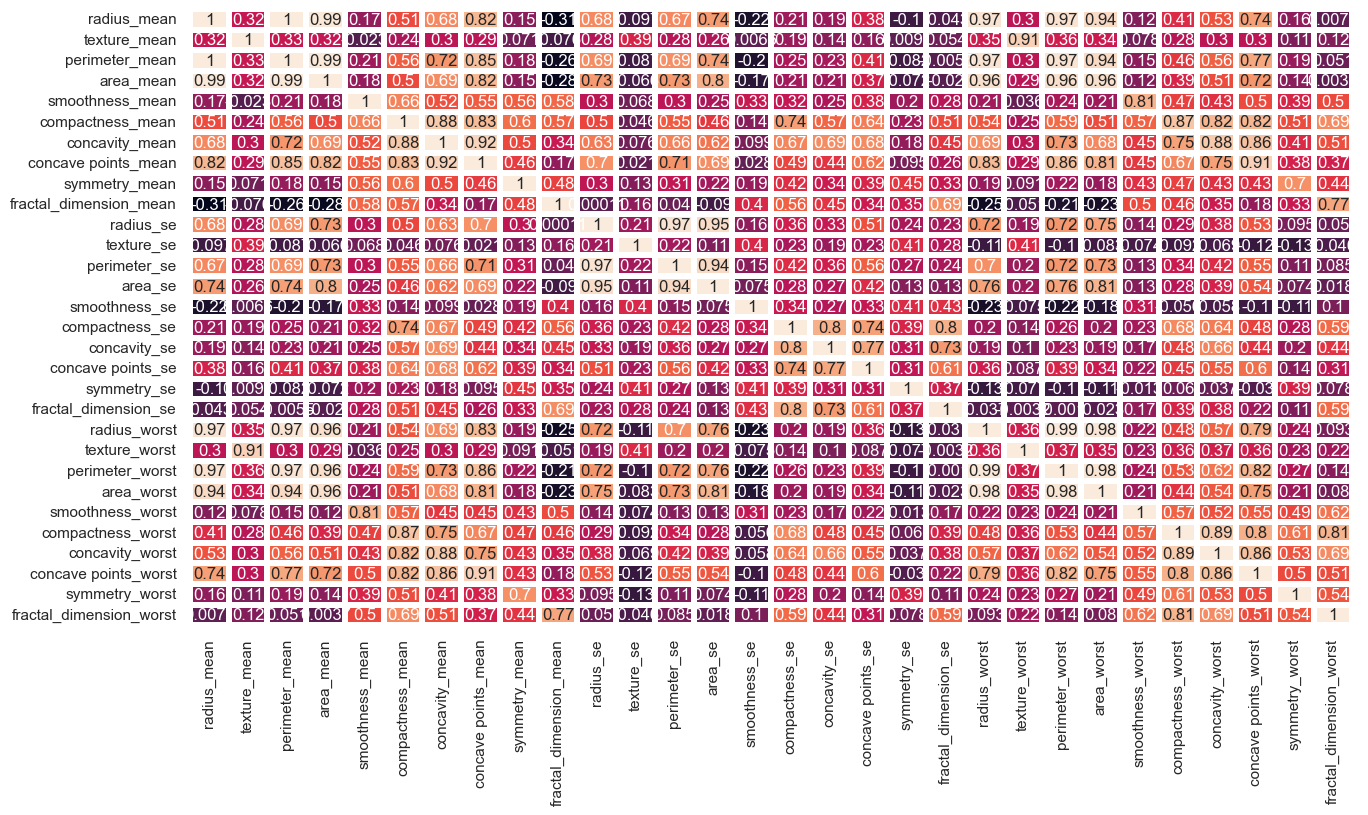

In [17]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.corr(), annot=True, linewidths=3, cbar=False)

In [18]:
data=data.drop(['radius_mean', 'area_mean', 'radius_mean', 'radius_worst', 'area_worst', 'perimeter_worst'], axis=1)

In [19]:
data=data.drop(['concavity_mean', 'concave points_mean', 'texture_worst'], axis=1)

In [20]:
data=data.drop(['area_se', 'perimeter_se', 'compactness_worst','concave points_worst'], axis=1)

In [21]:
data=data.drop(['smoothness_worst','concavity_worst'], axis=1)

<Axes: >

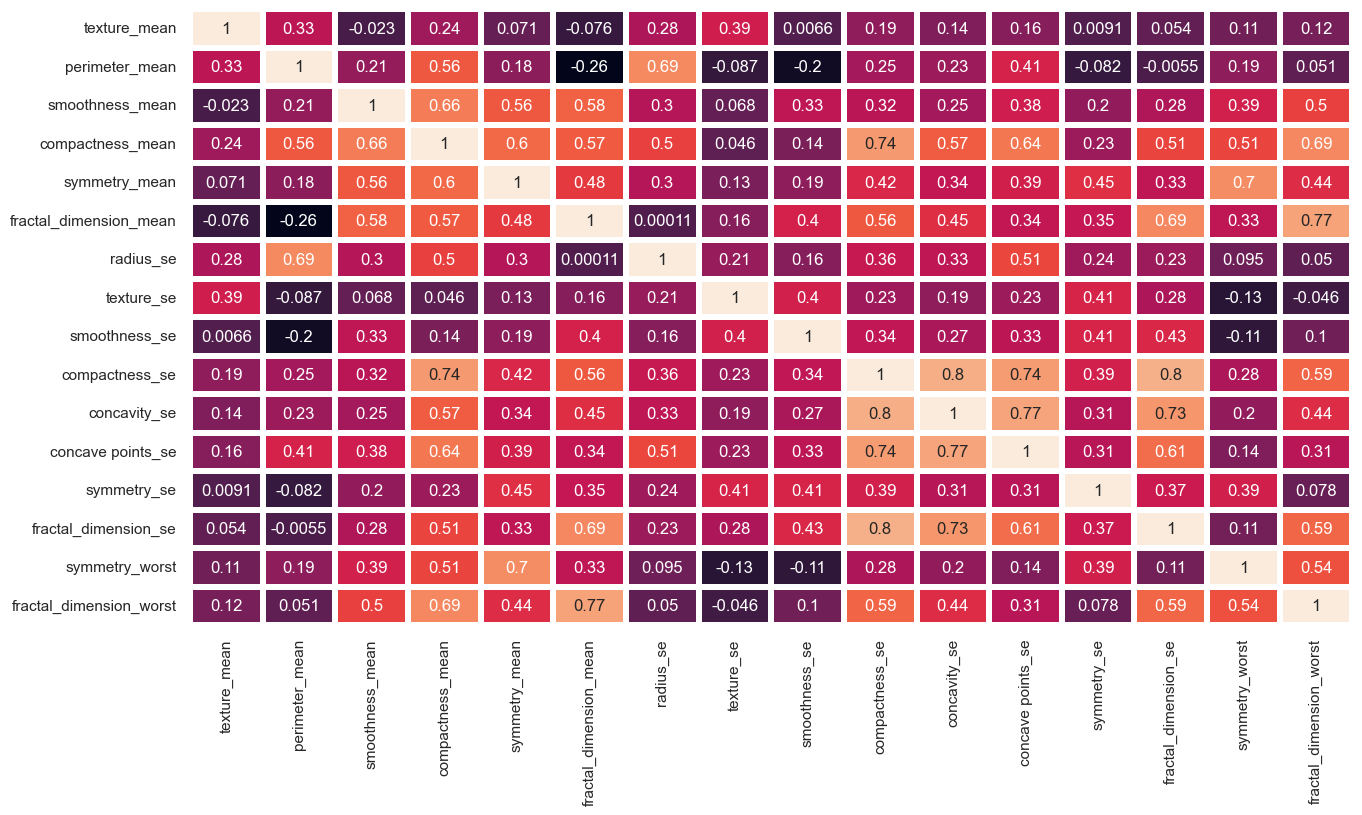

In [27]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.corr(), annot=True, linewidths=3, cbar=False)

In [38]:
X=data.to_numpy()

In [40]:
def standartize_data(X):
    mins_x=np.min(X,axis=0)
    maxs_x=np.max(X,axis=0)
    X_st=(X-mins_x)/(maxs_x-mins_x)
    return X_st

In [42]:
X_st=standartize_data(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_st, y, test_size=0.3, random_state=24)

## Применение линейного классификатора

In [131]:
lc_1=LinearClassifier()
Q_s,Q_starts=lc_1.train_sgd(X_train,y_train,margin_present=True, init_weights='correlation',lr=0.1,t=0.1, eps=0.0005,inertion=0.8, lambda_rec=0.95)
lc_1.count_accuracy(X_test,y_test)

0.8771929824561403

In [139]:
lc_2=LinearClassifier()
Q_s,Q_starts=lc_2.train_sgd(X_train,y_train,margin_present=True, init_weights='multistart',lr=0.1,t=0.1, eps=0.0001,inertion=0.8, lambda_rec=0.95)
lc_2.count_accuracy(X_test,y_test)

0.8713450292397661

In [141]:
lc_3=LinearClassifier()


In [149]:
Q_s,Q_starts=lc_3.train_sgd(X_train,y_train,margin_present=False, init_weights='correlation', lr=0.1,t=0.0001, eps=0.0005,inertion=0.8, lambda_rec=0.95)

In [151]:
lc_3.count_accuracy(X_test,y_test)

0.8888888888888888

In [153]:
lc_4=LinearClassifier()

In [155]:
Q_s,Q_starts=lc_4.train_sgd(X_train,y_train,margin_present=False, init_weights='multistart', lr=0.1
                            ,t=0.0001, eps=0.0005,inertion=0.8, lambda_rec=0.95)

In [157]:
lc_4.count_accuracy(X_train,y_train)

0.907035175879397

## Сравнение с эталонной реализацией

In [97]:
from sklearn.linear_model import SGDClassifier

In [99]:
clf = SGDClassifier(loss='squared_error', penalty="l2",learning_rate = 'constant',eta0=0.1)
clf.fit(X_train, y_train.astype('int'))

SGDClassifier(eta0=0.1, learning_rate='constant', loss='squared_error')

In [115]:
etalon_acc=np.array([])
for i in range(100):
    clf = SGDClassifier(loss='squared_error', penalty="l2",learning_rate = 'constant',eta0=0.1,alpha=0.05,max_iter=X_train.shape[0],tol=0.0005)
    clf.fit(X_train, y_train.astype('int'))
    etalon_acc=np.append(etalon_acc,np.sum(clf.predict(X_test)==y_test)/len(y_test))
np.mean(etalon_acc)    

0.8654385964912279

In [117]:
acc_4=np.array([])
for i in range(100):
    lc_4=LinearClassifier()
    Q_s,Q_starts=lc_4.train_sgd(X_train,y_train,margin_present=False, init_weights='multistart', lr=0.1
                            ,t=0.05, eps=0.0004,inertion=0.8, lambda_rec=0.95)
    acc_4=np.append(acc_4,lc_4.count_accuracy(X_test,y_test))
np.mean(acc_4)  

0.8732748538011694

In [119]:
lc_4=LinearClassifier()
Q_s,Q_starts=lc_4.train_sgd(X_train,y_train,margin_present=False, init_weights='multistart', lr=0.1
                            ,t=0.05, eps=0.0004,inertion=0.8, lambda_rec=0.95)

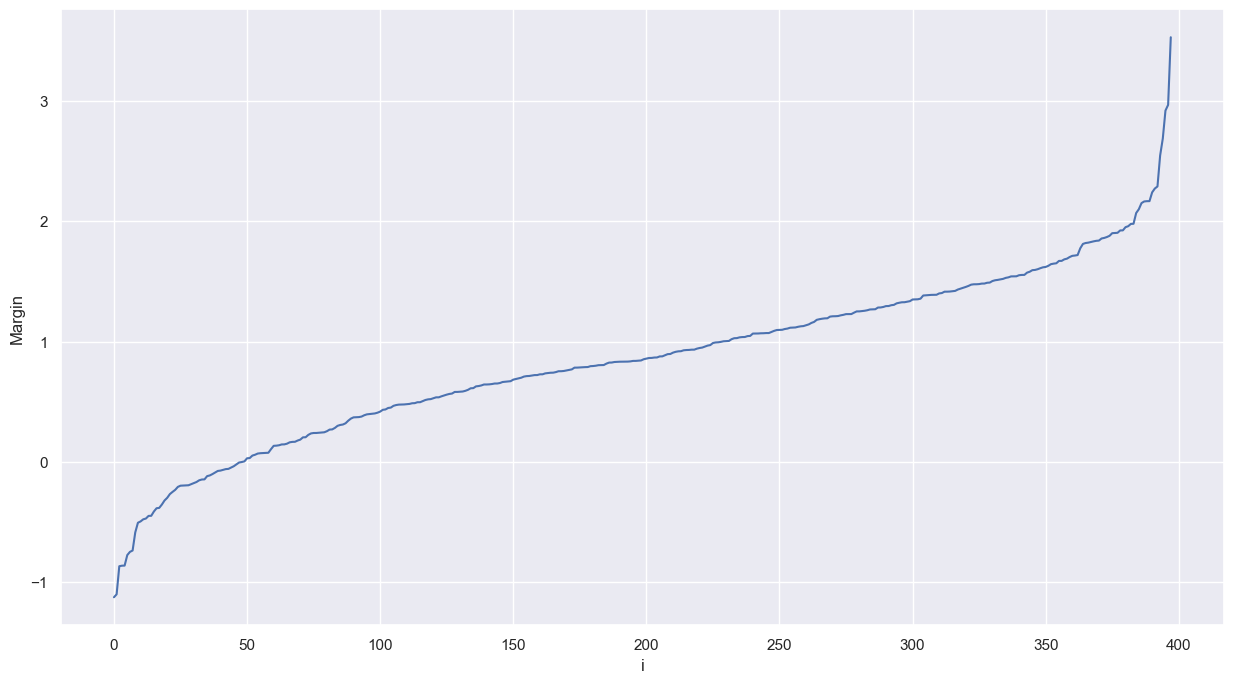

In [121]:
lc_4.visualise_margins(X_train,y_train)